In [1]:
pip install git+https://github.com/pgmpy/pgmpy.git

  Cloning https://github.com/pgmpy/pgmpy.git to /tmp/pip-req-build-f7aknf2u
  Running command git clone --filter=blob:none --quiet https://github.com/pgmpy/pgmpy.git /tmp/pip-req-build-f7aknf2u
  Resolved https://github.com/pgmpy/pgmpy.git to commit fcae6b42119df76fbe07d693f226e5b6659d6e62
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/heart_disease.csv')

In [4]:
df = df.dropna().drop_duplicates().reset_index(drop=True)

In [5]:
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [6]:
df.to_csv("cleaned_data.csv", index=False)

In [7]:
df['age'] = pd.cut(df['age'], bins=3, labels=["low", "medium", "high"])
df['chol'] = pd.cut(df['chol'], bins=3, labels=["low", "medium", "high"])
df['thalach'] = pd.cut(df['thalach'], bins=3, labels=["low", "medium", "high"])

In [8]:
model = DiscreteBayesianNetwork([
    ("age", "fbs"),
    ("fbs", "target"),
    ("target", "chol"),
    ("target", "thalach")
])

In [9]:
model.fit(df, estimator=MaximumLikelihoodEstimator)

In [10]:
infer = VariableElimination(model)
print("🔍 P(target | age = medium):")
print(infer.query(variables=["target"], evidence={"age": "medium"}))

🔍 P(target | age = medium):
+-------------+---------------+
| target      |   phi(target) |
+=============+===============+
| target(0.0) |        0.4578 |
+-------------+---------------+
| target(1.0) |        0.5422 |
+-------------+---------------+


In [11]:
print("\n P(target | age = 0.5):")
print(infer.query(variables=["target"], evidence={"age": "medium"}))


 P(target | age = 0.5):
+-------------+---------------+
| target      |   phi(target) |
+=============+===============+
| target(0.0) |        0.4578 |
+-------------+---------------+
| target(1.0) |        0.5422 |
+-------------+---------------+


In [12]:
print("\n P(chol | target = 1):")
print(infer.query(variables=["chol"], evidence={"target": 1}))


 P(chol | target = 1):
+--------------+-------------+
| chol         |   phi(chol) |
+==============+=============+
| chol(high)   |      0.0061 |
+--------------+-------------+
| chol(low)    |      0.7927 |
+--------------+-------------+
| chol(medium) |      0.2012 |
+--------------+-------------+


In [13]:
print("\n P(thalach | target = 1):")
print(infer.query(variables=["thalach"], evidence={"target": 1}))


 P(thalach | target = 1):
+-----------------+----------------+
| thalach         |   phi(thalach) |
+=================+================+
| thalach(high)   |         0.5610 |
+-----------------+----------------+
| thalach(low)    |         0.0244 |
+-----------------+----------------+
| thalach(medium) |         0.4146 |
+-----------------+----------------+


In [14]:
print("\n P(target | fbs = 1):")
print(infer.query(variables=["target"], evidence={"fbs": 1}))


 P(target | fbs = 1):
+-------------+---------------+
| target      |   phi(target) |
+=============+===============+
| target(0.0) |        0.4889 |
+-------------+---------------+
| target(1.0) |        0.5111 |
+-------------+---------------+


In [15]:
plt.figure(figsize=(8, 6))
G = nx.DiGraph()
G.add_edges_from(model.edges)

<Figure size 800x600 with 0 Axes>

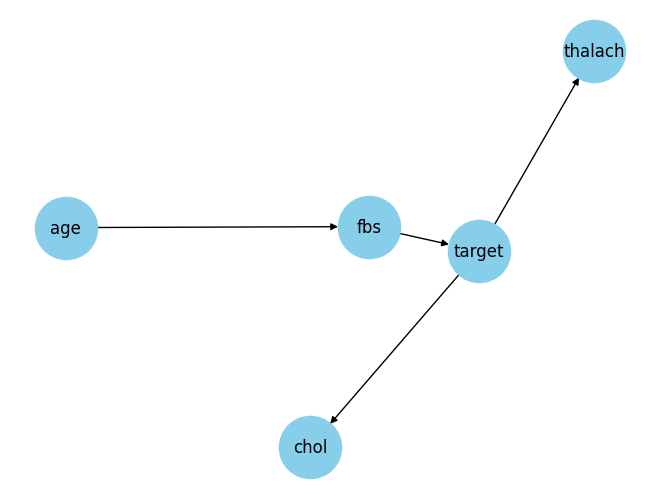

In [16]:
nx.draw(G, with_labels=True, node_color="skyblue", node_size=2000, font_size=12, arrows=True)

/tmp/ipython-input-17-15972331.py:2: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("bayesian_network.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


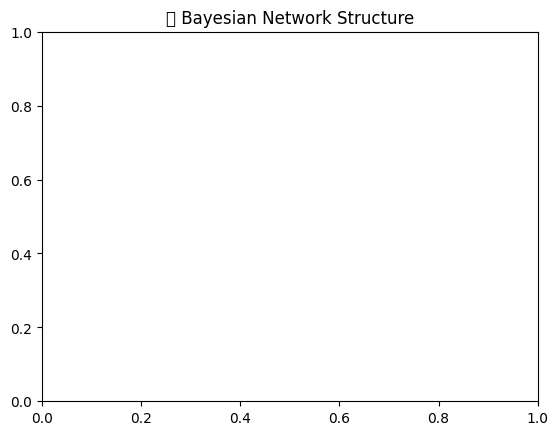

In [17]:
plt.title("📊 Bayesian Network Structure")
plt.savefig("bayesian_network.png")

In [19]:
infer = VariableElimination(model)

In [21]:
age_levels = ['low', 'medium', 'high']
chol_levels = ['low', 'medium', 'high']

In [23]:
print("P(target | age)")

P(target | age)


In [27]:
for level in age_levels:
    q = infer.query(variables=['target'], evidence={'age': level})
    print(f"age = {level} →\n{q}")

age = low →
+-------------+---------------+
| target      |   phi(target) |
+=============+===============+
| target(0.0) |        0.4534 |
+-------------+---------------+
| target(1.0) |        0.5466 |
+-------------+---------------+
age = medium →
+-------------+---------------+
| target      |   phi(target) |
+=============+===============+
| target(0.0) |        0.4578 |
+-------------+---------------+
| target(1.0) |        0.5422 |
+-------------+---------------+
age = high →
+-------------+---------------+
| target      |   phi(target) |
+=============+===============+
| target(0.0) |        0.4577 |
+-------------+---------------+
| target(1.0) |        0.5423 |
+-------------+---------------+


In [28]:
print("\nP(target | chol)")


P(target | chol)


In [29]:
for level in chol_levels:
    q = infer.query(variables=['target'], evidence={'chol': level})
    print(f"chol = {level} →\n{q}")

chol = low →
+-------------+---------------+
| target      |   phi(target) |
+=============+===============+
| target(0.0) |        0.4118 |
+-------------+---------------+
| target(1.0) |        0.5882 |
+-------------+---------------+
chol = medium →
+-------------+---------------+
| target      |   phi(target) |
+=============+===============+
| target(0.0) |        0.5875 |
+-------------+---------------+
| target(1.0) |        0.4125 |
+-------------+---------------+
chol = high →
+-------------+---------------+
| target      |   phi(target) |
+=============+===============+
| target(0.0) |        0.0000 |
+-------------+---------------+
| target(1.0) |        1.0000 |
+-------------+---------------+
